In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
from sympy import *

In [3]:
s, kon, koff, konp, koffp, g, a, b, a1, a2, b1, b2, a1p, b1p = \
    symbols((r'\sigma_R', r'\kappa_\text{on}', r'\kappa_\text{off}', r'\kappa_\text{on}^\prime', r'\kappa_\text{off}^\prime', r'\gamma', r'\alpha', r'\beta', r'\alpha_1', r'\alpha_2', r'\beta_1', r'\beta_2', r'\alpha_1^\prime', r'\beta_1^\prime'), positive=True, real=True)
srp, kon1, koff1, kon2, koff2, b2p, gp = \
    symbols((r'\sigma_r^\prime', r'\kappa_1^\text{on}', r'\kappa_1^\text{off}', r'\kappa_2^\text{on}', r'\kappa_2^\text{off}', r'\beta_2^\prime', r'\gamma^\prime'), positive=True, real=True)

In [4]:
R, r, rp, C1, C2, C1p = \
    symbols(('R', 'r', r'r^\prime', r'C_1', r'C_2', r'C_1^\prime'), positive=True, real=True)

In [5]:
def coefficient_plot(*expressions, height=3):
    # expression, title, width
    total_width = sum(e[2] for e in expressions)
    width_ratios = [e[2] / total_width for e in expressions]
    fig, axs = plt.subplots(figsize=(total_width, height), ncols=len(expressions), gridspec_kw={'width_ratios': width_ratios})
    for (i, (ax, (exp, title, width, *rest))) in enumerate(zip(axs, expressions)):
        ax.set_title(title)
        terms = poly(exp).terms()
        degs = [sum(x[0]) for x in terms]
        coeffs = [x[1] for x in terms]
        df = pd.DataFrame({'Degree': degs, 'Coefficient': coeffs}, dtype='int64')
        sns.histplot(data=df, x='Coefficient', hue='Degree', fill=True,
             discrete=True, multiple='stack', palette='rocket', ax=ax)
        if len(rest) > 0:
            ax.set_xticks(rest[0])
        if len(rest) > 1:
            ax.set_ylim(top=rest[1])
        if i > 0:
            ax.set_ylabel('')
    fig.tight_layout()

## C1KO

In [6]:
rhs_R = s - kon*R*r*r + koff*C2 - R + 2*b2*g*C2
rhs_r = 1 - 2*kon*R*r*r + 2*koff*C2 - g*r + 2*b2*g*C2 + 2*a2*C2
rhs_C2 = kon*R*r*r - koff*C2 - a2*C2 - 2*b2*g*C2

In [7]:
rhs_R

2*C_2*\beta_2*\gamma + C_2*\kappa_\text{off} - R*\kappa_\text{on}*r**2 - R + \sigma_R

In [8]:
rhs_r

2*C_2*\alpha_2 + 2*C_2*\beta_2*\gamma + 2*C_2*\kappa_\text{off} - 2*R*\kappa_\text{on}*r**2 - \gamma*r + 1

In [9]:
rhs_C2

-C_2*\alpha_2 - 2*C_2*\beta_2*\gamma - C_2*\kappa_\text{off} + R*\kappa_\text{on}*r**2

In [10]:
J = Matrix([rhs_R, rhs_r, rhs_C2]).jacobian(Matrix([R, r, C2]))
J

Matrix([
[-\kappa_\text{on}*r**2 - 1,          -2*R*\kappa_\text{on}*r,                2*\beta_2*\gamma + \kappa_\text{off}],
[  -2*\kappa_\text{on}*r**2, -4*R*\kappa_\text{on}*r - \gamma, 2*\alpha_2 + 2*\beta_2*\gamma + 2*\kappa_\text{off}],
[     \kappa_\text{on}*r**2,           2*R*\kappa_\text{on}*r,    -\alpha_2 - 2*\beta_2*\gamma - \kappa_\text{off}]])

In [11]:
p = J.charpoly()
cfs = p.all_coeffs()
p

PurePoly(lambda**3 + (4*R*\kappa_\text{on}*r + \alpha_2 + 2*\beta_2*\gamma + \gamma + \kappa_\text{off} + \kappa_\text{on}*r**2 + 1)*lambda**2 + (4*R*\beta_2*\gamma*\kappa_\text{on}*r + 4*R*\kappa_\text{on}*r + \alpha_2*\gamma + \alpha_2*\kappa_\text{on}*r**2 + \alpha_2 + 2*\beta_2*\gamma**2 + 2*\beta_2*\gamma + \gamma*\kappa_\text{off} + \gamma*\kappa_\text{on}*r**2 + \gamma + \kappa_\text{off})*lambda + 4*R*\beta_2*\gamma*\kappa_\text{on}*r + \alpha_2*\gamma*\kappa_\text{on}*r**2 + \alpha_2*\gamma + 2*\beta_2*\gamma**2 + \gamma*\kappa_\text{off}, lambda, domain='ZZ[r,R,\alpha_2,\beta_2,\gamma,\kappa_\text{off},\kappa_\text{on}]')

#### All coefficients are positive.

In [12]:
# Note cfs[x] is a_x in some literature for RH (https://math24.net/routh-hurwitz-criterion.html)
# In our SI, the subsript order is the opposite:  cfs[-(x+1)] is a_x

u = (cfs[1]*cfs[2] - cfs[0]*cfs[3]).expand().simplify()
u

16*R**2*\beta_2*\gamma*\kappa_\text{on}**2*r**2 + 16*R**2*\kappa_\text{on}**2*r**2 + 4*R*\alpha_2*\beta_2*\gamma*\kappa_\text{on}*r + 4*R*\alpha_2*\gamma*\kappa_\text{on}*r + 4*R*\alpha_2*\kappa_\text{on}**2*r**3 + 8*R*\alpha_2*\kappa_\text{on}*r + 8*R*\beta_2**2*\gamma**2*\kappa_\text{on}*r + 12*R*\beta_2*\gamma**2*\kappa_\text{on}*r + 4*R*\beta_2*\gamma*\kappa_\text{off}*\kappa_\text{on}*r + 4*R*\beta_2*\gamma*\kappa_\text{on}**2*r**3 + 16*R*\beta_2*\gamma*\kappa_\text{on}*r + 4*R*\gamma*\kappa_\text{off}*\kappa_\text{on}*r + 4*R*\gamma*\kappa_\text{on}**2*r**3 + 8*R*\gamma*\kappa_\text{on}*r + 8*R*\kappa_\text{off}*\kappa_\text{on}*r + 4*R*\kappa_\text{on}**2*r**3 + 4*R*\kappa_\text{on}*r + \alpha_2**2*\gamma + \alpha_2**2*\kappa_\text{on}*r**2 + \alpha_2**2 + 4*\alpha_2*\beta_2*\gamma**2 + 2*\alpha_2*\beta_2*\gamma*\kappa_\text{on}*r**2 + 4*\alpha_2*\beta_2*\gamma + \alpha_2*\gamma**2 + 2*\alpha_2*\gamma*\kappa_\text{off} + 2*\alpha_2*\gamma*\kappa_\text{on}*r**2 + 2*\alpha_2*\gamm

In [13]:
[cf.is_positive for cf in [*cfs, u]]

[True, True, True, True, True]

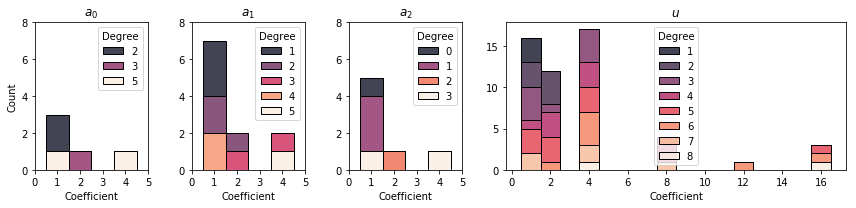

In [14]:
coefficient_plot([cfs[3], '$a_0$', 2, range(6), 8], 
                 [cfs[2], '$a_1$', 2, range(6), 8], 
                 [cfs[1], '$a_2$', 2, range(6), 8],
                 [u, '$u$', 6])
#plt.savefig('rh_c1ko.svg')

## C2KO

In [15]:
rhs_R = s - kon*R*r - konp*R*r + koff*C1 + koffp*C1p - R + b1*g*C1 + b1p*g*C1p
rhs_r = 1 - kon*R*r - konp*R*r + koff*C1 + koffp*C1p - g*r + a1*C1 + a1p*C1p
rhs_C1 = kon*R*r - koff*C1 - a1*C1 - b1*g*C1
rhs_C1p = konp*R*r - koffp*C1p - a1p*C1p - b1p*g*C1p

In [16]:
J = Matrix([rhs_R, rhs_r, rhs_C1, rhs_C1p]).jacobian(Matrix([R, r, C1, C1p]))
J

Matrix([
[-\kappa_\text{on}*r - \kappa_\text{on}^\prime*r - 1,          -R*\kappa_\text{on} - R*\kappa_\text{on}^\prime,             \beta_1*\gamma + \kappa_\text{off},                    \beta_1^\prime*\gamma + \kappa_\text{off}^\prime],
[    -\kappa_\text{on}*r - \kappa_\text{on}^\prime*r, -R*\kappa_\text{on} - R*\kappa_\text{on}^\prime - \gamma,                   \alpha_1 + \kappa_\text{off},                          \alpha_1^\prime + \kappa_\text{off}^\prime],
[                                 \kappa_\text{on}*r,                                       R*\kappa_\text{on}, -\alpha_1 - \beta_1*\gamma - \kappa_\text{off},                                                                   0],
[                          \kappa_\text{on}^\prime*r,                                R*\kappa_\text{on}^\prime,                                              0, -\alpha_1^\prime - \beta_1^\prime*\gamma - \kappa_\text{off}^\prime]])

In [17]:
p = J.charpoly()
cfs = p.all_coeffs()
u1 = (cfs[1]*cfs[2] - cfs[0]*cfs[3]).expand().simplify()

In [18]:
cfs[4]

R*\alpha_1*\beta_1^\prime*\gamma*\kappa_\text{on}^\prime + R*\alpha_1^\prime*\beta_1*\gamma*\kappa_\text{on} + R*\beta_1*\beta_1^\prime*\gamma**2*\kappa_\text{on} + R*\beta_1*\beta_1^\prime*\gamma**2*\kappa_\text{on}^\prime + R*\beta_1*\gamma*\kappa_\text{off}^\prime*\kappa_\text{on} + R*\beta_1^\prime*\gamma*\kappa_\text{off}*\kappa_\text{on}^\prime + \alpha_1*\alpha_1^\prime*\gamma*\kappa_\text{on}*r + \alpha_1*\alpha_1^\prime*\gamma*\kappa_\text{on}^\prime*r + \alpha_1*\alpha_1^\prime*\gamma + \alpha_1*\beta_1^\prime*\gamma**2*\kappa_\text{on}*r + \alpha_1*\beta_1^\prime*\gamma**2 + \alpha_1*\gamma*\kappa_\text{off}^\prime*\kappa_\text{on}*r + \alpha_1*\gamma*\kappa_\text{off}^\prime + \alpha_1^\prime*\beta_1*\gamma**2*\kappa_\text{on}^\prime*r + \alpha_1^\prime*\beta_1*\gamma**2 + \alpha_1^\prime*\gamma*\kappa_\text{off}*\kappa_\text{on}^\prime*r + \alpha_1^\prime*\gamma*\kappa_\text{off} + \beta_1*\beta_1^\prime*\gamma**3 + \beta_1*\gamma**2*\kappa_\text{off}^\prime + \beta_1^\pri

In [19]:
cfs[3]

R*\alpha_1*\beta_1^\prime*\gamma*\kappa_\text{on}^\prime + R*\alpha_1*\kappa_\text{on}^\prime + R*\alpha_1^\prime*\beta_1*\gamma*\kappa_\text{on} + R*\alpha_1^\prime*\kappa_\text{on} + R*\beta_1*\beta_1^\prime*\gamma**2*\kappa_\text{on} + R*\beta_1*\beta_1^\prime*\gamma**2*\kappa_\text{on}^\prime + R*\beta_1*\gamma*\kappa_\text{off}^\prime*\kappa_\text{on} + R*\beta_1*\gamma*\kappa_\text{on} + R*\beta_1*\gamma*\kappa_\text{on}^\prime + R*\beta_1^\prime*\gamma*\kappa_\text{off}*\kappa_\text{on}^\prime + R*\beta_1^\prime*\gamma*\kappa_\text{on} + R*\beta_1^\prime*\gamma*\kappa_\text{on}^\prime + R*\kappa_\text{off}*\kappa_\text{on}^\prime + R*\kappa_\text{off}^\prime*\kappa_\text{on} + \alpha_1*\alpha_1^\prime*\gamma + \alpha_1*\alpha_1^\prime*\kappa_\text{on}*r + \alpha_1*\alpha_1^\prime*\kappa_\text{on}^\prime*r + \alpha_1*\alpha_1^\prime + \alpha_1*\beta_1^\prime*\gamma**2 + \alpha_1*\beta_1^\prime*\gamma*\kappa_\text{on}*r + \alpha_1*\beta_1^\prime*\gamma + \alpha_1*\gamma*\kappa_\te

In [20]:
poly(u1).coeffs().__len__()

282

In [21]:
min(poly(u1).coeffs())

1

In [22]:
v1 = (cfs[1]*cfs[2]*cfs[3] - cfs[1]**2*cfs[4]-cfs[0]*cfs[3]**2).expand().simplify()

In [23]:
poly(v1).coeffs().__len__()

5091

In [24]:
min(poly(v1).coeffs())

1

In [25]:
[cf.is_positive for cf in [*cfs, u1, v1]]

[True, True, True, True, True, True, True]

**All coefficients and necessary expressions are always positive.**

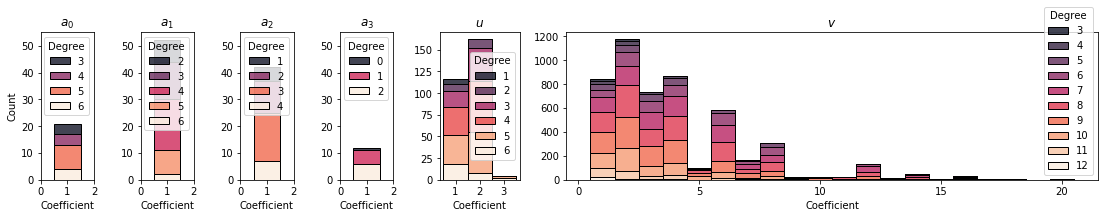

In [26]:
coefficient_plot([cfs[4], '$a_0$', 1, range(3), 55], 
                 [cfs[3], '$a_1$', 1, range(3), 55], 
                 [cfs[2], '$a_2$', 1, range(3), 55], 
                 [cfs[1], '$a_3$', 1, range(3), 55],
                 [u1, '$u$', 1.5], 
                 [v1, '$v$', 10, range(0, 21, 5)])
#plt.savefig('rh_c2ko.svg')

## MMI1

In [27]:
rhs_R = s - kon*R*r + koff*C1 - R + b*g*C1
rhs_r = 1 - kon*R*r + koff*C1 - g*r + a*C1
rhs_C1 = kon*R*r - koff*C1 - a*C1 - b*g*C1

In [28]:
rhs_R

C_1*\beta*\gamma + C_1*\kappa_\text{off} - R*\kappa_\text{on}*r - R + \sigma_R

In [29]:
rhs_r

C_1*\alpha + C_1*\kappa_\text{off} - R*\kappa_\text{on}*r - \gamma*r + 1

In [30]:
rhs_C1

-C_1*\alpha - C_1*\beta*\gamma - C_1*\kappa_\text{off} + R*\kappa_\text{on}*r

In [31]:
J = Matrix([rhs_R, rhs_r, rhs_C1]).jacobian(Matrix([R, r, C1]))
J

Matrix([
[-\kappa_\text{on}*r - 1,          -R*\kappa_\text{on},           \beta*\gamma + \kappa_\text{off}],
[    -\kappa_\text{on}*r, -R*\kappa_\text{on} - \gamma,                 \alpha + \kappa_\text{off}],
[     \kappa_\text{on}*r,           R*\kappa_\text{on}, -\alpha - \beta*\gamma - \kappa_\text{off}]])

In [32]:
p = J.charpoly()
cfs = p.all_coeffs()
p

PurePoly(lambda**3 + (R*\kappa_\text{on} + \alpha + \beta*\gamma + \gamma + \kappa_\text{off} + \kappa_\text{on}*r + 1)*lambda**2 + (R*\beta*\gamma*\kappa_\text{on} + R*\kappa_\text{on} + \alpha*\gamma + \alpha*\kappa_\text{on}*r + \alpha + \beta*\gamma**2 + \beta*\gamma + \gamma*\kappa_\text{off} + \gamma*\kappa_\text{on}*r + \gamma + \kappa_\text{off})*lambda + R*\beta*\gamma*\kappa_\text{on} + \alpha*\gamma*\kappa_\text{on}*r + \alpha*\gamma + \beta*\gamma**2 + \gamma*\kappa_\text{off}, lambda, domain='ZZ[r,R,\alpha,\beta,\gamma,\kappa_\text{off},\kappa_\text{on}]')

In [33]:
# Third-order system: all four coefficients must be positive...
cfs[0]

1

In [34]:
cfs[1]

R*\kappa_\text{on} + \alpha + \beta*\gamma + \gamma + \kappa_\text{off} + \kappa_\text{on}*r + 1

In [35]:
cfs[2]

R*\beta*\gamma*\kappa_\text{on} + R*\kappa_\text{on} + \alpha*\gamma + \alpha*\kappa_\text{on}*r + \alpha + \beta*\gamma**2 + \beta*\gamma + \gamma*\kappa_\text{off} + \gamma*\kappa_\text{on}*r + \gamma + \kappa_\text{off}

In [36]:
cfs[3]

R*\beta*\gamma*\kappa_\text{on} + \alpha*\gamma*\kappa_\text{on}*r + \alpha*\gamma + \beta*\gamma**2 + \gamma*\kappa_\text{off}

In [37]:
# ...as must Δ2 = a1*a2 - a0*a3
u = (cfs[1]*cfs[2] - cfs[0]*cfs[3]).expand().simplify()
u

R**2*\beta*\gamma*\kappa_\text{on}**2 + R**2*\kappa_\text{on}**2 + R*\alpha*\beta*\gamma*\kappa_\text{on} + R*\alpha*\gamma*\kappa_\text{on} + R*\alpha*\kappa_\text{on}**2*r + 2*R*\alpha*\kappa_\text{on} + R*\beta**2*\gamma**2*\kappa_\text{on} + 2*R*\beta*\gamma**2*\kappa_\text{on} + R*\beta*\gamma*\kappa_\text{off}*\kappa_\text{on} + R*\beta*\gamma*\kappa_\text{on}**2*r + 2*R*\beta*\gamma*\kappa_\text{on} + R*\gamma*\kappa_\text{off}*\kappa_\text{on} + R*\gamma*\kappa_\text{on}**2*r + 2*R*\gamma*\kappa_\text{on} + 2*R*\kappa_\text{off}*\kappa_\text{on} + R*\kappa_\text{on}**2*r + R*\kappa_\text{on} + \alpha**2*\gamma + \alpha**2*\kappa_\text{on}*r + \alpha**2 + 2*\alpha*\beta*\gamma**2 + \alpha*\beta*\gamma*\kappa_\text{on}*r + 2*\alpha*\beta*\gamma + \alpha*\gamma**2 + 2*\alpha*\gamma*\kappa_\text{off} + 2*\alpha*\gamma*\kappa_\text{on}*r + 2*\alpha*\gamma + \alpha*\kappa_\text{off}*\kappa_\text{on}*r + 2*\alpha*\kappa_\text{off} + \alpha*\kappa_\text{on}**2*r**2 + 2*\alpha*\kappa_\t

In [38]:
min(Poly(u).coeffs())

1

In [39]:
[exp.is_positive for exp in [*cfs, u]]

[True, True, True, True, True]

**All coefficients and required expressions are positive.**

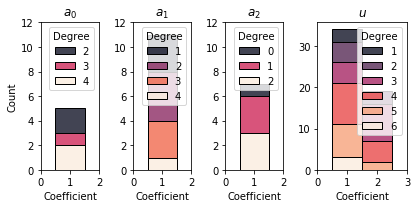

In [40]:
coefficient_plot([cfs[3], '$a_0$', 1.3, range(3), 12], 
                 [cfs[2], '$a_1$', 1.3, range(3), 12], 
                 [cfs[1], '$a_2$', 1.3, range(3), 12],
                 [u, '$u$', 2, range(4)])
#plt.savefig('rh_mmi1.svg')

## MMI2-SSB

In [41]:
rhs_R = s - 2*kon*R*r + 2*koff*C1 - R + 2*b1*g*C1
rhs_r = 1 - 2*kon*R*r + 2*koff*C1 - 2*kon*C1*r + 2*koff*C2 - g*r + 2*a1*C1 + 2*a2*C2
rhs_C1 = kon*R*r - koff*C1 - kon*C1*r + koff*C2 - a1*C1 - b1*g*C1 + b2*g*C2
rhs_C2 = 2*kon*C1*r - 2*koff*C2 - a2*C2 - 2*b2*g*C2

In [42]:
rhs_R

2*C_1*\beta_1*\gamma + 2*C_1*\kappa_\text{off} - 2*R*\kappa_\text{on}*r - R + \sigma_R

In [43]:
rhs_r

2*C_1*\alpha_1 + 2*C_1*\kappa_\text{off} - 2*C_1*\kappa_\text{on}*r + 2*C_2*\alpha_2 + 2*C_2*\kappa_\text{off} - 2*R*\kappa_\text{on}*r - \gamma*r + 1

In [44]:
rhs_C1

-C_1*\alpha_1 - C_1*\beta_1*\gamma - C_1*\kappa_\text{off} - C_1*\kappa_\text{on}*r + C_2*\beta_2*\gamma + C_2*\kappa_\text{off} + R*\kappa_\text{on}*r

In [45]:
rhs_C2

2*C_1*\kappa_\text{on}*r - C_2*\alpha_2 - 2*C_2*\beta_2*\gamma - 2*C_2*\kappa_\text{off}

In [46]:
J = Matrix([rhs_R, rhs_r, rhs_C1, rhs_C2]).jacobian(Matrix([R, r, C1, C2]))
J

Matrix([
[-2*\kappa_\text{on}*r - 1,                                   -2*R*\kappa_\text{on},                              2*\beta_1*\gamma + 2*\kappa_\text{off},                                                  0],
[    -2*\kappa_\text{on}*r, -2*C_1*\kappa_\text{on} - 2*R*\kappa_\text{on} - \gamma,             2*\alpha_1 + 2*\kappa_\text{off} - 2*\kappa_\text{on}*r,                   2*\alpha_2 + 2*\kappa_\text{off}],
[       \kappa_\text{on}*r,              -C_1*\kappa_\text{on} + R*\kappa_\text{on}, -\alpha_1 - \beta_1*\gamma - \kappa_\text{off} - \kappa_\text{on}*r,                 \beta_2*\gamma + \kappa_\text{off}],
[                        0,                                  2*C_1*\kappa_\text{on},                                                2*\kappa_\text{on}*r, -\alpha_2 - 2*\beta_2*\gamma - 2*\kappa_\text{off}]])

In [47]:
p = J.charpoly()
cfs = p.all_coeffs()
p

PurePoly(lambda**4 + (2*C_1*\kappa_\text{on} + 2*R*\kappa_\text{on} + \alpha_1 + \alpha_2 + \beta_1*\gamma + 2*\beta_2*\gamma + \gamma + 3*\kappa_\text{off} + 3*\kappa_\text{on}*r + 1)*lambda**3 + (4*C_1*\alpha_1*\kappa_\text{on} - 2*C_1*\alpha_2*\kappa_\text{on} + 2*C_1*\beta_1*\gamma*\kappa_\text{on} + 4*C_1*\beta_2*\gamma*\kappa_\text{on} + 4*C_1*\kappa_\text{off}*\kappa_\text{on} + 4*C_1*\kappa_\text{on}**2*r + 2*C_1*\kappa_\text{on} + 2*R*\alpha_2*\kappa_\text{on} + 2*R*\beta_1*\gamma*\kappa_\text{on} + 4*R*\beta_2*\gamma*\kappa_\text{on} + 4*R*\kappa_\text{off}*\kappa_\text{on} + 4*R*\kappa_\text{on}**2*r + 2*R*\kappa_\text{on} + \alpha_1*\alpha_2 + 2*\alpha_1*\beta_2*\gamma + \alpha_1*\gamma + 2*\alpha_1*\kappa_\text{off} + 2*\alpha_1*\kappa_\text{on}*r + \alpha_1 + \alpha_2*\beta_1*\gamma + \alpha_2*\gamma + \alpha_2*\kappa_\text{off} + 3*\alpha_2*\kappa_\text{on}*r + \alpha_2 + 2*\beta_1*\beta_2*\gamma**2 + \beta_1*\gamma**2 + 2*\beta_1*\gamma*\kappa_\text{off} + \beta_1*\gamm

In [48]:
# Fourth-order system: all five coefficients must be positive...
cfs[0]

1

In [49]:
cfs[1]

2*C_1*\kappa_\text{on} + 2*R*\kappa_\text{on} + \alpha_1 + \alpha_2 + \beta_1*\gamma + 2*\beta_2*\gamma + \gamma + 3*\kappa_\text{off} + 3*\kappa_\text{on}*r + 1

In [50]:
cfs[2].factor(C1, kon)

4*C_1*\kappa_\text{on}**2*r + C_1*\kappa_\text{on}*(4*\alpha_1 - 2*\alpha_2 + 2*\beta_1*\gamma + 4*\beta_2*\gamma + 4*\kappa_\text{off} + 2) + \alpha_1*\alpha_2 + 2*\alpha_1*\beta_2*\gamma + \alpha_1*\gamma + 2*\alpha_1*\kappa_\text{off} + \alpha_1 + \alpha_2*\beta_1*\gamma + \alpha_2*\gamma + \alpha_2*\kappa_\text{off} + \alpha_2 + 2*\beta_1*\beta_2*\gamma**2 + \beta_1*\gamma**2 + 2*\beta_1*\gamma*\kappa_\text{off} + \beta_1*\gamma + 2*\beta_2*\gamma**2 + 2*\beta_2*\gamma*\kappa_\text{off} + 2*\beta_2*\gamma + 3*\gamma*\kappa_\text{off} + \gamma + 2*\kappa_\text{off}**2 + 3*\kappa_\text{off} + \kappa_\text{on}**2*(4*R*r + 2*r**2) + \kappa_\text{on}*(2*R*\alpha_2 + 2*R*\beta_1*\gamma + 4*R*\beta_2*\gamma + 4*R*\kappa_\text{off} + 2*R + 2*\alpha_1*r + 3*\alpha_2*r + 4*\beta_2*\gamma*r + 3*\gamma*r + 4*\kappa_\text{off}*r + r)

In [51]:
[c for c in Poly(cfs[2]).coeffs() if c < 0] # negative coefficient

[-2]

In [52]:
cfs[3].factor(C1, kon)

C_1*\kappa_\text{on}**2*(8*\alpha_1*r - 4*\alpha_2*r - 4*\beta_1*\gamma*r + 8*\beta_2*\gamma*r) + C_1*\kappa_\text{on}*(4*\alpha_1*\beta_2*\gamma + 4*\alpha_1 - 2*\alpha_2*\beta_1*\gamma - 2*\alpha_2 + 4*\beta_1*\beta_2*\gamma**2 + 2*\beta_1*\gamma + 4*\beta_2*\gamma*\kappa_\text{off} + 4*\beta_2*\gamma + 4*\kappa_\text{off}) + \alpha_1*\alpha_2*\gamma + \alpha_1*\alpha_2 + 2*\alpha_1*\beta_2*\gamma**2 + 2*\alpha_1*\beta_2*\gamma + 2*\alpha_1*\gamma*\kappa_\text{off} + \alpha_1*\gamma + 2*\alpha_1*\kappa_\text{off} + \alpha_2*\beta_1*\gamma**2 + \alpha_2*\beta_1*\gamma + \alpha_2*\gamma*\kappa_\text{off} + \alpha_2*\gamma + \alpha_2*\kappa_\text{off} + 2*\beta_1*\beta_2*\gamma**3 + 2*\beta_1*\beta_2*\gamma**2 + 2*\beta_1*\gamma**2*\kappa_\text{off} + \beta_1*\gamma**2 + 2*\beta_1*\gamma*\kappa_\text{off} + 2*\beta_2*\gamma**2*\kappa_\text{off} + 2*\beta_2*\gamma**2 + 2*\beta_2*\gamma*\kappa_\text{off} + 2*\gamma*\kappa_\text{off}**2 + 3*\gamma*\kappa_\text{off} + 2*\kappa_\text{off}**2

In [53]:
[c for c in Poly(cfs[3]).coeffs() if c < 0]

[-4, -4, -2, -2]

In [54]:
cfs[4]

8*C_1*\alpha_1*\beta_2*\gamma*\kappa_\text{on}**2*r + 4*C_1*\alpha_1*\beta_2*\gamma*\kappa_\text{on} - 4*C_1*\alpha_2*\beta_1*\gamma*\kappa_\text{on}**2*r - 2*C_1*\alpha_2*\beta_1*\gamma*\kappa_\text{on} + 4*C_1*\beta_1*\beta_2*\gamma**2*\kappa_\text{on} + 4*C_1*\beta_2*\gamma*\kappa_\text{off}*\kappa_\text{on} + 2*R*\alpha_2*\beta_1*\gamma*\kappa_\text{on} + 4*R*\beta_1*\beta_2*\gamma**2*\kappa_\text{on} + 4*R*\beta_1*\gamma*\kappa_\text{off}*\kappa_\text{on} + 4*R*\beta_2*\gamma*\kappa_\text{on}**2*r + 2*\alpha_1*\alpha_2*\gamma*\kappa_\text{on}*r + \alpha_1*\alpha_2*\gamma + 4*\alpha_1*\beta_2*\gamma**2*\kappa_\text{on}*r + 2*\alpha_1*\beta_2*\gamma**2 + 4*\alpha_1*\gamma*\kappa_\text{off}*\kappa_\text{on}*r + 2*\alpha_1*\gamma*\kappa_\text{off} + \alpha_2*\beta_1*\gamma**2 + \alpha_2*\gamma*\kappa_\text{off} + 2*\alpha_2*\gamma*\kappa_\text{on}**2*r**2 + \alpha_2*\gamma*\kappa_\text{on}*r + 2*\beta_1*\beta_2*\gamma**3 + 2*\beta_1*\gamma**2*\kappa_\text{off} + 2*\beta_2*\gamma**2*\k

In [55]:
[c for c in Poly(cfs[4]).coeffs() if c < 0]

[-4, -2]

In [56]:
[cf.is_positive for cf in cfs]

[True, True, None, None, None]

**Not all coefficients are always positive - test inconclusive.**

In [57]:
[(i, len(Poly(cf).terms())) for (i, cf) in enumerate(cfs) if isinstance(cf, Add)]

[(1, 10), (2, 40), (3, 56), (4, 24)]

## MMI2-ASB

In [58]:
rhs_R = s - kon1*R*r + koff1*C1 - R + b1*g*C1
rhs_r = 1 - kon1*R*r + koff1*C1 - kon2*C1*r + koff2*C2 - g*r + a1*C1 + 2*a2*C2
rhs_C1 = kon1*R*r - koff1*C1 - kon2*C1*r + koff2*C2 - a1*C1 - b1*g*C1 + b2*g*C2
rhs_C2 = kon2*C1*r - koff2*C2 - a2*C2 - b2*g*C2

In [59]:
rhs_R

C_1*\beta_1*\gamma + C_1*\kappa_1^\text{off} - R*\kappa_1^\text{on}*r - R + \sigma_R

In [60]:
rhs_r

C_1*\alpha_1 + C_1*\kappa_1^\text{off} - C_1*\kappa_2^\text{on}*r + 2*C_2*\alpha_2 + C_2*\kappa_2^\text{off} - R*\kappa_1^\text{on}*r - \gamma*r + 1

In [61]:
rhs_C1

-C_1*\alpha_1 - C_1*\beta_1*\gamma - C_1*\kappa_1^\text{off} - C_1*\kappa_2^\text{on}*r + C_2*\beta_2*\gamma + C_2*\kappa_2^\text{off} + R*\kappa_1^\text{on}*r

In [62]:
rhs_C2

C_1*\kappa_2^\text{on}*r - C_2*\alpha_2 - C_2*\beta_2*\gamma - C_2*\kappa_2^\text{off}

In [63]:
J = Matrix([rhs_R, rhs_r, rhs_C1, rhs_C2]).jacobian(Matrix([R, r, C1, C2]))
J

Matrix([
[-\kappa_1^\text{on}*r - 1,                                   -R*\kappa_1^\text{on},                                    \beta_1*\gamma + \kappa_1^\text{off},                                                0],
[    -\kappa_1^\text{on}*r, -C_1*\kappa_2^\text{on} - R*\kappa_1^\text{on} - \gamma,                   \alpha_1 + \kappa_1^\text{off} - \kappa_2^\text{on}*r,                 2*\alpha_2 + \kappa_2^\text{off}],
[     \kappa_1^\text{on}*r,          -C_1*\kappa_2^\text{on} + R*\kappa_1^\text{on}, -\alpha_1 - \beta_1*\gamma - \kappa_1^\text{off} - \kappa_2^\text{on}*r,             \beta_2*\gamma + \kappa_2^\text{off}],
[                        0,                                  C_1*\kappa_2^\text{on},                                                    \kappa_2^\text{on}*r, -\alpha_2 - \beta_2*\gamma - \kappa_2^\text{off}]])

In [64]:
p = J.charpoly()
cfs = p.all_coeffs()
p

PurePoly(lambda**4 + (C_1*\kappa_2^\text{on} + R*\kappa_1^\text{on} + \alpha_1 + \alpha_2 + \beta_1*\gamma + \beta_2*\gamma + \gamma + \kappa_1^\text{off} + \kappa_1^\text{on}*r + \kappa_2^\text{off} + \kappa_2^\text{on}*r + 1)*lambda**3 + (2*C_1*\alpha_1*\kappa_2^\text{on} - C_1*\alpha_2*\kappa_2^\text{on} + C_1*\beta_1*\gamma*\kappa_2^\text{on} + C_1*\beta_2*\gamma*\kappa_2^\text{on} + 2*C_1*\kappa_1^\text{off}*\kappa_2^\text{on} + C_1*\kappa_1^\text{on}*\kappa_2^\text{on}*r + C_1*\kappa_2^\text{on} + R*\alpha_2*\kappa_1^\text{on} + R*\beta_1*\gamma*\kappa_1^\text{on} + R*\beta_2*\gamma*\kappa_1^\text{on} + R*\kappa_1^\text{on}*\kappa_2^\text{off} + 2*R*\kappa_1^\text{on}*\kappa_2^\text{on}*r + R*\kappa_1^\text{on} + \alpha_1*\alpha_2 + \alpha_1*\beta_2*\gamma + \alpha_1*\gamma + \alpha_1*\kappa_1^\text{on}*r + \alpha_1*\kappa_2^\text{off} + \alpha_1 + \alpha_2*\beta_1*\gamma + \alpha_2*\gamma + \alpha_2*\kappa_1^\text{off} + \alpha_2*\kappa_1^\text{on}*r + \alpha_2*\kappa_2^\text{on

In [65]:
# Fourth-order system: all five coefficients must be positive...
cfs[0]

1

In [66]:
cfs[1]

C_1*\kappa_2^\text{on} + R*\kappa_1^\text{on} + \alpha_1 + \alpha_2 + \beta_1*\gamma + \beta_2*\gamma + \gamma + \kappa_1^\text{off} + \kappa_1^\text{on}*r + \kappa_2^\text{off} + \kappa_2^\text{on}*r + 1

In [67]:
cfs[2]

2*C_1*\alpha_1*\kappa_2^\text{on} - C_1*\alpha_2*\kappa_2^\text{on} + C_1*\beta_1*\gamma*\kappa_2^\text{on} + C_1*\beta_2*\gamma*\kappa_2^\text{on} + 2*C_1*\kappa_1^\text{off}*\kappa_2^\text{on} + C_1*\kappa_1^\text{on}*\kappa_2^\text{on}*r + C_1*\kappa_2^\text{on} + R*\alpha_2*\kappa_1^\text{on} + R*\beta_1*\gamma*\kappa_1^\text{on} + R*\beta_2*\gamma*\kappa_1^\text{on} + R*\kappa_1^\text{on}*\kappa_2^\text{off} + 2*R*\kappa_1^\text{on}*\kappa_2^\text{on}*r + R*\kappa_1^\text{on} + \alpha_1*\alpha_2 + \alpha_1*\beta_2*\gamma + \alpha_1*\gamma + \alpha_1*\kappa_1^\text{on}*r + \alpha_1*\kappa_2^\text{off} + \alpha_1 + \alpha_2*\beta_1*\gamma + \alpha_2*\gamma + \alpha_2*\kappa_1^\text{off} + \alpha_2*\kappa_1^\text{on}*r + \alpha_2*\kappa_2^\text{on}*r + \alpha_2 + \beta_1*\beta_2*\gamma**2 + \beta_1*\gamma**2 + \beta_1*\gamma*\kappa_2^\text{off} + \beta_1*\gamma + \beta_2*\gamma**2 + \beta_2*\gamma*\kappa_1^\text{off} + \beta_2*\gamma*\kappa_1^\text{on}*r + \beta_2*\gamma + \gamma*\ka

In [68]:
cfs[3]

C_1*\alpha_1*\beta_2*\gamma*\kappa_2^\text{on} + 2*C_1*\alpha_1*\kappa_1^\text{on}*\kappa_2^\text{on}*r + 2*C_1*\alpha_1*\kappa_2^\text{on} - C_1*\alpha_2*\beta_1*\gamma*\kappa_2^\text{on} - C_1*\alpha_2*\kappa_1^\text{on}*\kappa_2^\text{on}*r - C_1*\alpha_2*\kappa_2^\text{on} + C_1*\beta_1*\beta_2*\gamma**2*\kappa_2^\text{on} - C_1*\beta_1*\gamma*\kappa_1^\text{on}*\kappa_2^\text{on}*r + C_1*\beta_1*\gamma*\kappa_2^\text{on} + C_1*\beta_2*\gamma*\kappa_1^\text{off}*\kappa_2^\text{on} + C_1*\beta_2*\gamma*\kappa_1^\text{on}*\kappa_2^\text{on}*r + C_1*\beta_2*\gamma*\kappa_2^\text{on} + 2*C_1*\kappa_1^\text{off}*\kappa_2^\text{on} + R*\alpha_2*\beta_1*\gamma*\kappa_1^\text{on} + R*\alpha_2*\kappa_1^\text{on} + R*\beta_1*\beta_2*\gamma**2*\kappa_1^\text{on} + R*\beta_1*\gamma*\kappa_1^\text{on}*\kappa_2^\text{off} + R*\beta_1*\gamma*\kappa_1^\text{on} + R*\beta_2*\gamma*\kappa_1^\text{on}*\kappa_2^\text{on}*r + R*\beta_2*\gamma*\kappa_1^\text{on} + R*\kappa_1^\text{on}*\kappa_2^\text{off

In [69]:
cfs[4]

C_1*\alpha_1*\beta_2*\gamma*\kappa_1^\text{on}*\kappa_2^\text{on}*r + C_1*\alpha_1*\beta_2*\gamma*\kappa_2^\text{on} - C_1*\alpha_2*\beta_1*\gamma*\kappa_1^\text{on}*\kappa_2^\text{on}*r - C_1*\alpha_2*\beta_1*\gamma*\kappa_2^\text{on} + C_1*\beta_1*\beta_2*\gamma**2*\kappa_2^\text{on} + C_1*\beta_2*\gamma*\kappa_1^\text{off}*\kappa_2^\text{on} + R*\alpha_2*\beta_1*\gamma*\kappa_1^\text{on} + R*\beta_1*\beta_2*\gamma**2*\kappa_1^\text{on} + R*\beta_1*\gamma*\kappa_1^\text{on}*\kappa_2^\text{off} + R*\beta_2*\gamma*\kappa_1^\text{on}*\kappa_2^\text{on}*r + \alpha_1*\alpha_2*\gamma*\kappa_1^\text{on}*r + \alpha_1*\alpha_2*\gamma + \alpha_1*\beta_2*\gamma**2*\kappa_1^\text{on}*r + \alpha_1*\beta_2*\gamma**2 + \alpha_1*\gamma*\kappa_1^\text{on}*\kappa_2^\text{off}*r + \alpha_1*\gamma*\kappa_2^\text{off} + \alpha_2*\beta_1*\gamma**2 + \alpha_2*\gamma*\kappa_1^\text{off} + \alpha_2*\gamma*\kappa_1^\text{on}*\kappa_2^\text{on}*r**2 + \alpha_2*\gamma*\kappa_2^\text{on}*r + \beta_1*\beta_2*\gam

In [70]:
[cf.is_positive for cf in cfs]

[True, True, None, None, None]

**Not all coefficients are always positive - test inconclusive.**

In [71]:
[(i, len(Poly(cf).terms())) for (i, cf) in enumerate(cfs) if isinstance(cf, Add)]

[(1, 12), (2, 44), (3, 58), (4, 24)]

## MMI2-DMI

In [72]:
rhs_R = s - kon*R*r - konp*R*rp + koff*C1 + koffp*C1p - R + b1*g*C1 + b1p*gp*C1p
rhs_r = 1 - kon*R*r + koff*C1 - kon*C1p*r + koff*C2 - g*r + a1*C1 + a2*C2
rhs_rp = srp - konp*R*rp + koffp*C1p - konp*C1*rp + koffp*C2 - gp*rp + a1p*C1p + a2*C2
rhs_C1 = kon*R*r - koff*C1 - konp*C1*rp + koffp*C2 - a1*C1 - b1*g*C1 + b2p*gp*C2
rhs_C1p = konp*R*rp - koffp*C1p - kon*C1p*r + koff*C2 - a1p*C1p - b1p*gp*C1p + b2*g*C2
rhs_C2 =  kon*C1p*r + konp*C1*rp - koff*C2 - koffp*C2 -   a2*C2 - b2*g*C2 - b2p*gp*C2

In [73]:
rhs_R

C_1*\beta_1*\gamma + C_1*\kappa_\text{off} + C_1^\prime*\beta_1^\prime*\gamma^\prime + C_1^\prime*\kappa_\text{off}^\prime - R*\kappa_\text{on}*r - R*\kappa_\text{on}^\prime*r^\prime - R + \sigma_R

In [74]:
rhs_r

C_1*\alpha_1 + C_1*\kappa_\text{off} - C_1^\prime*\kappa_\text{on}*r + C_2*\alpha_2 + C_2*\kappa_\text{off} - R*\kappa_\text{on}*r - \gamma*r + 1

In [75]:
rhs_rp

-C_1*\kappa_\text{on}^\prime*r^\prime + C_1^\prime*\alpha_1^\prime + C_1^\prime*\kappa_\text{off}^\prime + C_2*\alpha_2 + C_2*\kappa_\text{off}^\prime - R*\kappa_\text{on}^\prime*r^\prime - \gamma^\prime*r^\prime + \sigma_r^\prime

In [76]:
rhs_C1

-C_1*\alpha_1 - C_1*\beta_1*\gamma - C_1*\kappa_\text{off} - C_1*\kappa_\text{on}^\prime*r^\prime + C_2*\beta_2^\prime*\gamma^\prime + C_2*\kappa_\text{off}^\prime + R*\kappa_\text{on}*r

In [77]:
rhs_C1p

-C_1^\prime*\alpha_1^\prime - C_1^\prime*\beta_1^\prime*\gamma^\prime - C_1^\prime*\kappa_\text{off}^\prime - C_1^\prime*\kappa_\text{on}*r + C_2*\beta_2*\gamma + C_2*\kappa_\text{off} + R*\kappa_\text{on}^\prime*r^\prime

In [78]:
rhs_C2

C_1*\kappa_\text{on}^\prime*r^\prime + C_1^\prime*\kappa_\text{on}*r - C_2*\alpha_2 - C_2*\beta_2*\gamma - C_2*\beta_2^\prime*\gamma^\prime - C_2*\kappa_\text{off} - C_2*\kappa_\text{off}^\prime

In [79]:
J = Matrix([rhs_R, rhs_r, rhs_rp, rhs_C1, rhs_C1p, rhs_C2]).jacobian(Matrix([R, r, rp, C1, C1p, C2]))
J

Matrix([
[-\kappa_\text{on}*r - \kappa_\text{on}^\prime*r^\prime - 1,                                        -R*\kappa_\text{on},                                               -R*\kappa_\text{on}^\prime,                                                \beta_1*\gamma + \kappa_\text{off},                                         \beta_1^\prime*\gamma^\prime + \kappa_\text{off}^\prime,                                                                                                        0],
[                                       -\kappa_\text{on}*r, -C_1^\prime*\kappa_\text{on} - R*\kappa_\text{on} - \gamma,                                                                        0,                                                      \alpha_1 + \kappa_\text{off},                                                                             -\kappa_\text{on}*r,                                                                             \alpha_2 + \kappa_\text{off}],
[                         -

In [80]:
p = J.charpoly()
cfs = p.all_coeffs()

In [81]:
[(i, len(Poly(cf).terms())) for (i, cf) in enumerate(cfs) if isinstance(cf, Add)]

[(1, 18), (2, 142), (3, 576), (4, 1075), (5, 906), (6, 274)]

In [82]:
# This is a sixth-order system with huge coefficients - check simple necessary conditions like a[n] > 0 first
[c for c in poly(cfs[6]).coeffs() if c < 0]

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]

In [83]:
max(c for c in poly(cfs[6]).coeffs())

1

In [84]:
a6 = cfs[-1]
a6.args[-1]

-C_1^\prime*R*\alpha_2*\beta_1*\beta_1^\prime*\gamma*\gamma^\prime*\kappa_\text{on}**2*\kappa_\text{on}^\prime*r

In [85]:
a6.args[81]

C_1*\alpha_1^\prime*\beta_2^\prime*\gamma*\gamma^\prime*\kappa_\text{off}*\kappa_\text{on}^\prime

In [86]:
print(cfs[6].is_positive)

None


**A necessary coefficient is not always positive - test inconclusive.**